## Análise de Sono
Durante x dias eu realizei a coleta e registro dos dados do meu sono. 

Foi utilizado o Smartwatch Redmi GTS 2 Mini para coletar os dados.

Importação de bibliotecas

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Transformando arquivo .csv em DataFrame

In [2]:
raw_data = pd.read_csv("../data/sleep_data.csv")

Visualização inicial 

In [3]:
raw_data

,Data,Dia da semana,Pontuação,Início,Fim,Duração,Regularidade,Sono profundo,REM,Tempo acordado,Vezes acordado
0,01/05,quinta-feira,72,22:39,06:43,07:58,90,00:39,01:42,6,3
1,02/05,sexta-feira,93,22:32,06:22,07:44,90,01:20,01:10,6,1
2,03/05,sábado,80,22:19,07:30,08:59,90,01:23,01:36,12,4
3,04/05,domingo,77,22:17,07:21,08:35,95,01:12,01:45,29,4
4,05/05,segunda-feira,85,22:08,05:31,07:08,89,01:12,01:38,15,2
...,...,...,...,...,...,...,...,...,...,...,...
68,08/07,terça-feira,78,22:33,07:20,08:39,71,01:03,01:58,8,3
69,09/07,quarta-feira,82,22:29,06:59,08:25,75,01:13,01:14,5,3
70,10/07,quinta-feira,76,00:34,08:30,07:52,74,00:58,01:30,4,2
71,11/07,sexta-feira,85,22:52,07:04,08:03,77,01:16,01:38,9,2


In [ ]:
raw_data = raw_data.rename(columns="Data": "data", "Dia da semana": "dia_semana", 
"Pontuação": "pontuacao", "Início": "inicio", "Fim": "fim", "Duração": "duracao",
"Regularidade": "regularidade", "Sono profundo", "sono_profundo", "Tempo acordado":
"tempo_acordado", "Vezes acordado", "vezes_acordado"
)

SyntaxError: invalid syntax (4210582095.py, line 1)

Verificação de Nulos

In [ ]:
raw_data.isna().sum()

Data              0
Dia da semana     0
Pontuação         0
Início            0
Fim               0
Duração           0
Regularidade      0
Sono profundo     0
REM               0
Tempo acordado    0
Vezes acordado    0
dtype: int64

Conversão de dados de horas para minutos

In [5]:
raw_data["Sono profundo (min)"] = raw_data["Sono profundo"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["REM (min)"] = raw_data["REM"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["Duração (min)"] = raw_data["Duração"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))

Cálculo de "Sono leve (min)" 

Subtraindo REM (min) e Sono profundo (min) da Duração (min)

In [6]:
raw_data["Sono leve (min)"] = raw_data["Duração (min)"] - raw_data["REM (min)"] - raw_data["Sono profundo (min)"]

Cálculo de porcentagem relativa 

REM - Sono profundo e Sono leve

In [7]:
raw_data["%REM"] = raw_data.apply(lambda x: round((x["REM (min)"] / x["Duração (min)"]) * 100, 2), axis=1)
raw_data["%Sono profundo"] = raw_data.apply(lambda x: round((x["Sono profundo (min)"] / x["Duração (min)"]) * 100, 2), axis=1)
raw_data["%Sono leve"] = raw_data.apply(lambda x: round((x["Sono leve (min)"] / x["Duração (min)"]) * 100, 2), axis=1)

Visualização do Data Frame após novas colunas criadas

In [8]:
raw_data.head()

,Data,Dia da semana,Pontuação,Início,Fim,Duração,Regularidade,Sono profundo,REM,Tempo acordado,Vezes acordado,Sono profundo (min),REM (min),Duração (min),Sono leve (min),%REM,%Sono profundo,%Sono leve
0,01/05,quinta-feira,72,22:39,06:43,07:58,90,00:39,01:42,6,3,39,102,478,337,21.34,8.16,70.50
1,02/05,sexta-feira,93,22:32,06:22,07:44,90,01:20,01:10,6,1,80,70,464,314,15.09,17.24,67.67
2,03/05,sábado,80,22:19,07:30,08:59,90,01:23,01:36,12,4,83,96,539,360,17.81,15.40,66.79
3,04/05,domingo,77,22:17,07:21,08:35,95,01:12,01:45,29,4,72,105,515,338,20.39,13.98,65.63
4,05/05,segunda-feira,85,22:08,05:31,07:08,89,01:12,01:38,15,2,72,98,428,258,22.90,16.82,60.28


Conversão da coluna "Data" para formato datetime

In [9]:
from datetime import datetime

raw_data["Data"] = pd.to_datetime(
    raw_data["Data"] + f"/{datetime.now().year}", 
    format="%d/%m/%Y"
)


Formatação para remover as horas "00:00:00"

In [10]:
raw_data["Data"] = pd.to_datetime(raw_data["Data"]).dt.date

Após limpeza inicial, criação de novo Data Frame reorganizando as colunas iniciais

In [11]:
data = raw_data[["Data", "Dia da semana", "Pontuação","Regularidade", 
                 "Duração (min)", "Sono leve (min)","%Sono leve", 
                 "Sono profundo (min)", "%Sono profundo", "REM (min)", "%REM", 
                 "Tempo acordado", "Vezes acordado"               
]]

In [12]:
data.head()

,Data,Dia da semana,Pontuação,Regularidade,Duração (min),Sono leve (min),%Sono leve,Sono profundo (min),%Sono profundo,REM (min),%REM,Tempo acordado,Vezes acordado
0,2025-05-01,quinta-feira,72,90,478,337,70.50,39,8.16,102,21.34,6,3
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
2,2025-05-03,sábado,80,90,539,360,66.79,83,15.40,96,17.81,12,4
3,2025-05-04,domingo,77,95,515,338,65.63,72,13.98,105,20.39,29,4
4,2025-05-05,segunda-feira,85,89,428,258,60.28,72,16.82,98,22.90,15,2


Criação de lista "Métricas"

In [13]:
metricas = ["Pontuação","Regularidade", 
            "Duração (min)", "Sono leve (min)","%Sono leve", 
            "Sono profundo (min)", "%Sono profundo", "REM (min)", "%REM", 
            "Tempo acordado", "Vezes acordado"]

Visualização de outliers 

Utilização de Scater Plot para visualizar dados

Utilização de Line Plot para visualizar Linha Inferior, Linha Superior e Média


Análise de Outliers - Pontuação
• Primeiro Quartil (Q1): 76.00
• Terceiro Quartil (Q3): 85.00
• IQR: 9.00
• Limite Inferior: 62.50
• Limite Superior: 98.50
• Outliers Detected: 1


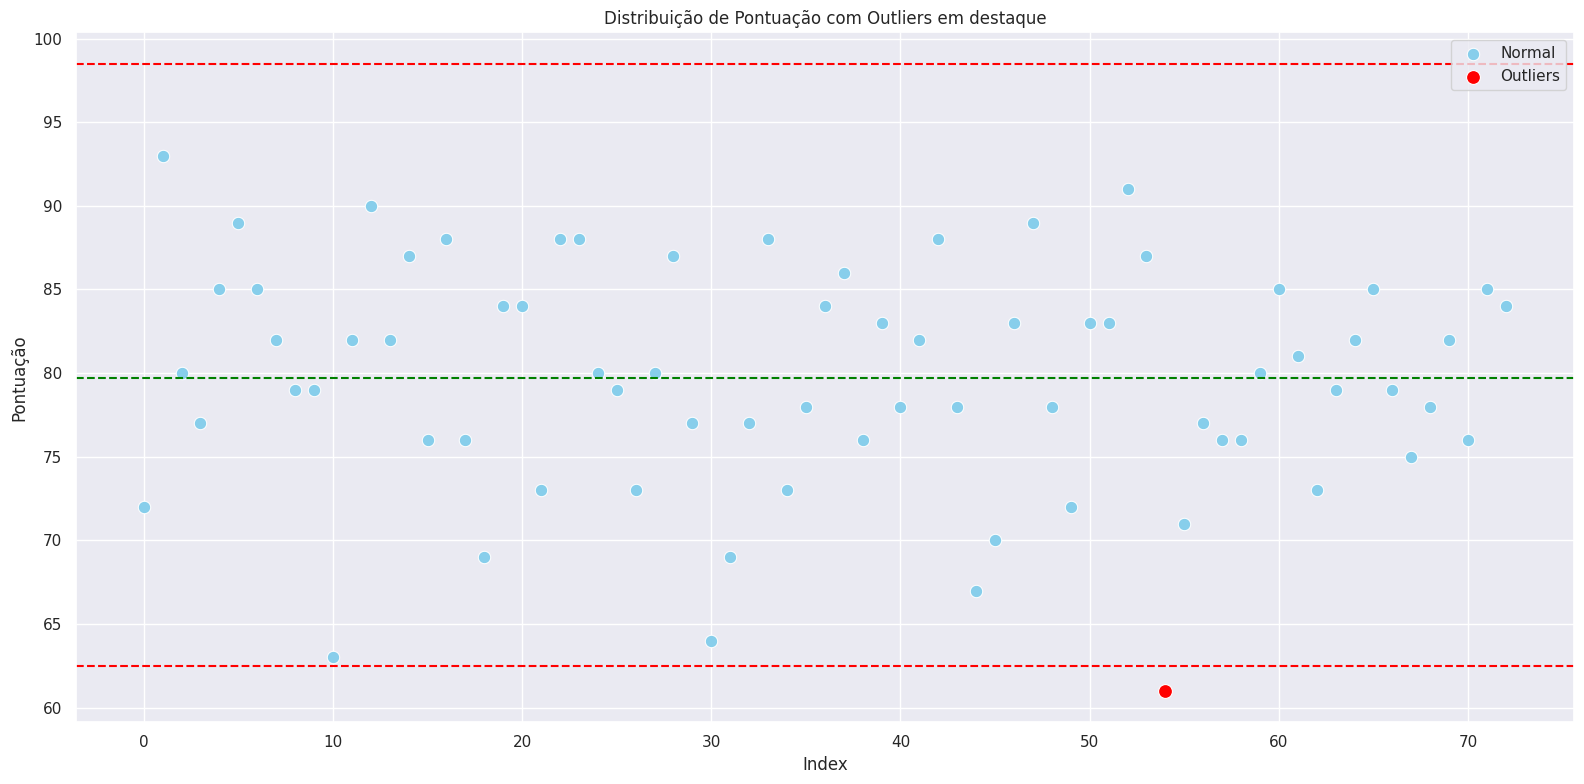


Análise de Outliers - Regularidade
• Primeiro Quartil (Q1): 76.00
• Terceiro Quartil (Q3): 84.00
• IQR: 8.00
• Limite Inferior: 64.00
• Limite Superior: 96.00
• Outliers Detected: 0


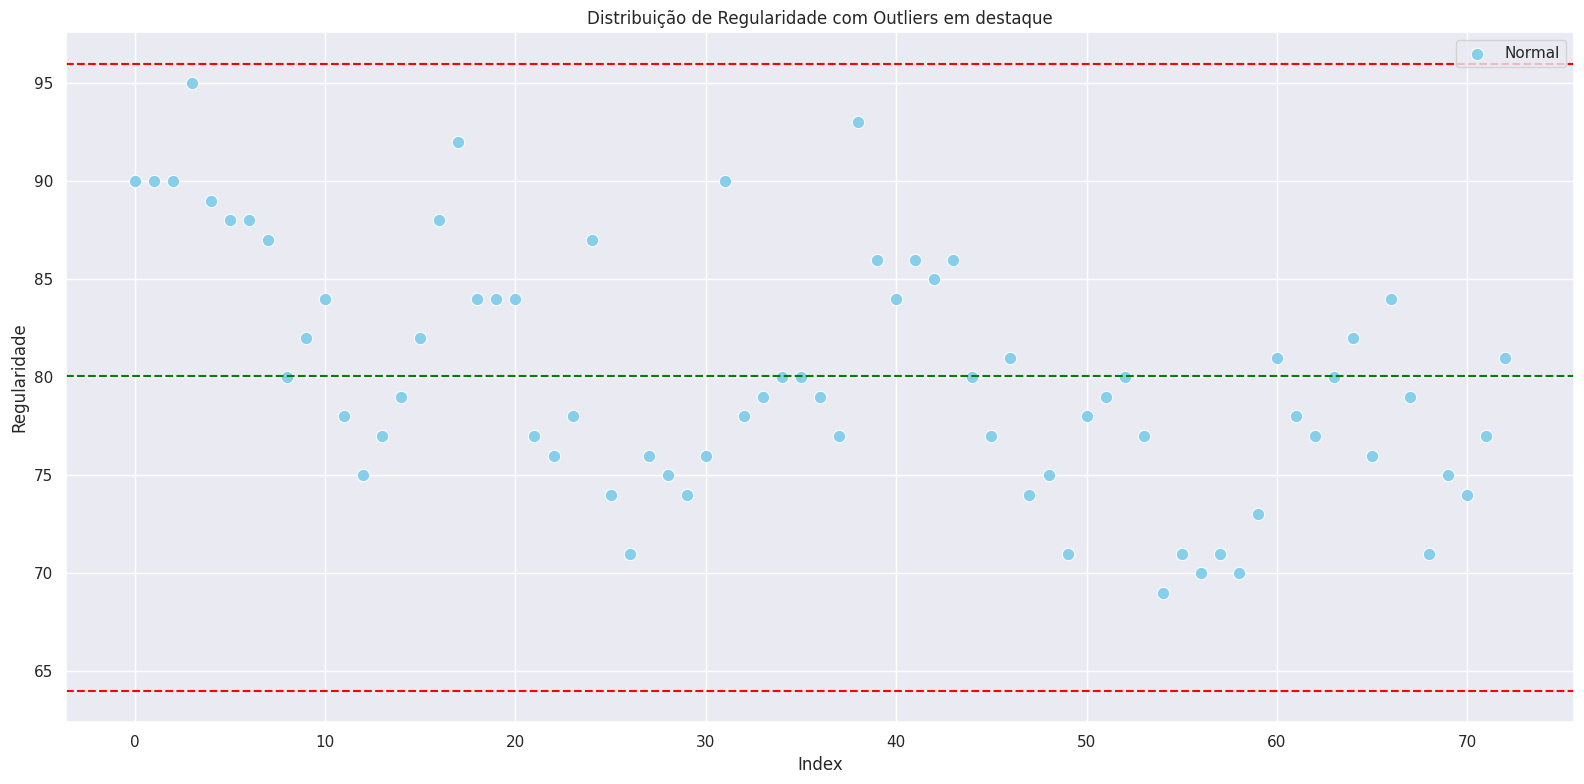


Análise de Outliers - Duração (min)
• Primeiro Quartil (Q1): 387.00
• Terceiro Quartil (Q3): 469.00
• IQR: 82.00
• Limite Inferior: 264.00
• Limite Superior: 592.00
• Outliers Detected: 0


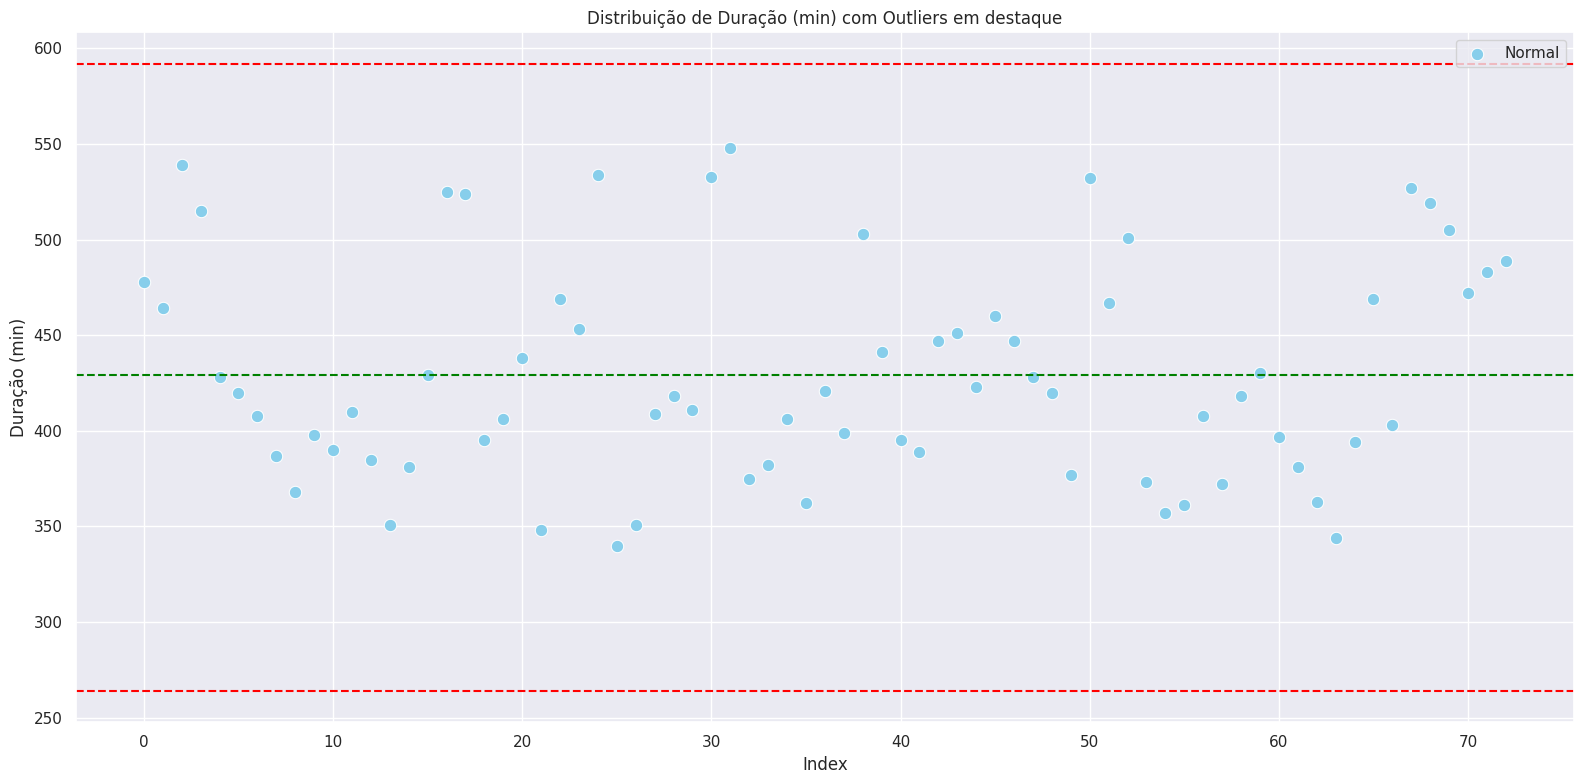


Análise de Outliers - Sono leve (min)
• Primeiro Quartil (Q1): 256.00
• Terceiro Quartil (Q3): 324.00
• IQR: 68.00
• Limite Inferior: 154.00
• Limite Superior: 426.00
• Outliers Detected: 0


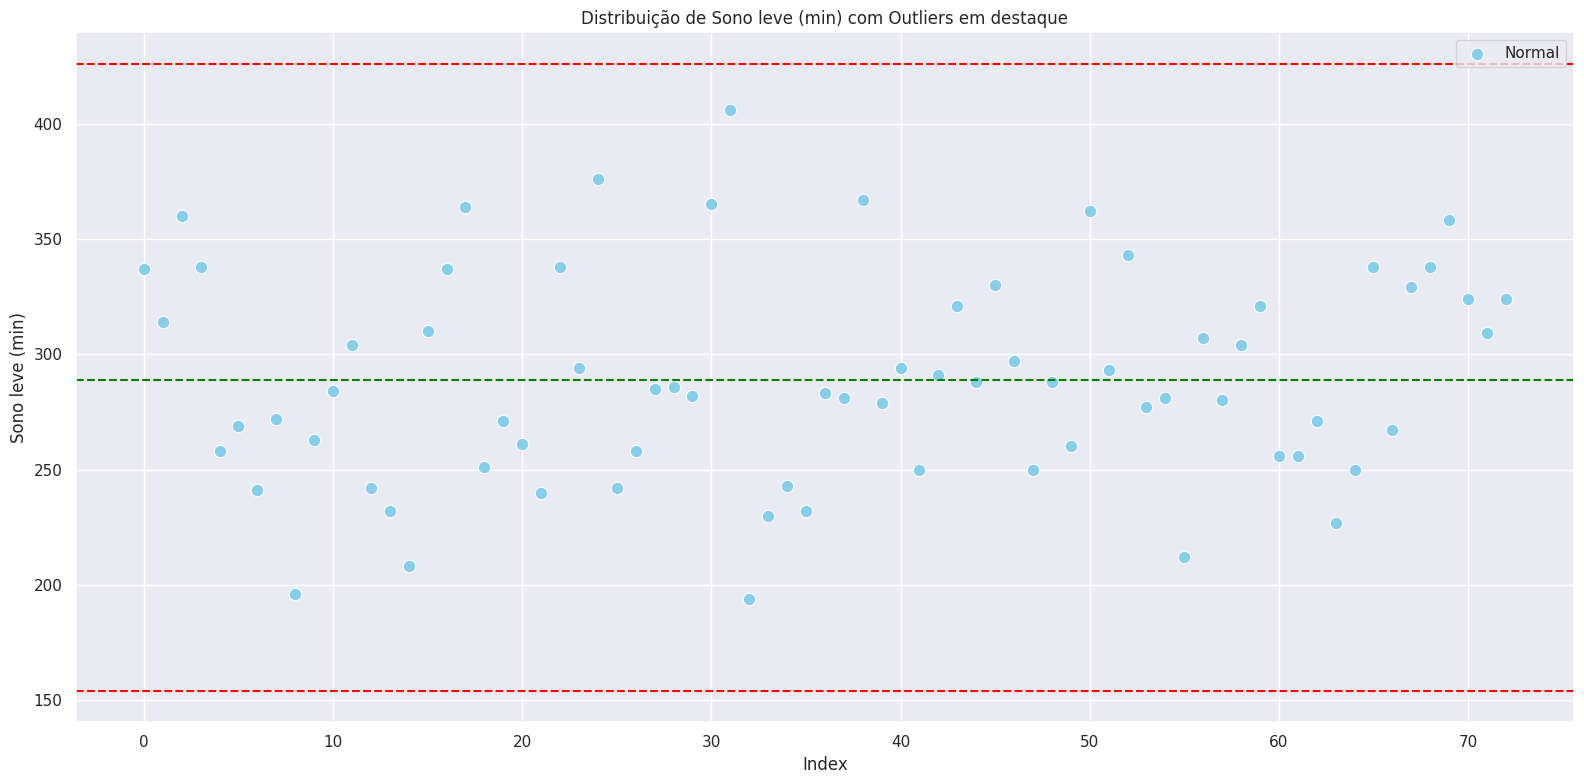


Análise de Outliers - %Sono leve
• Primeiro Quartil (Q1): 64.09
• Terceiro Quartil (Q3): 71.18
• IQR: 7.09
• Limite Inferior: 53.45
• Limite Superior: 81.82
• Outliers Detected: 2


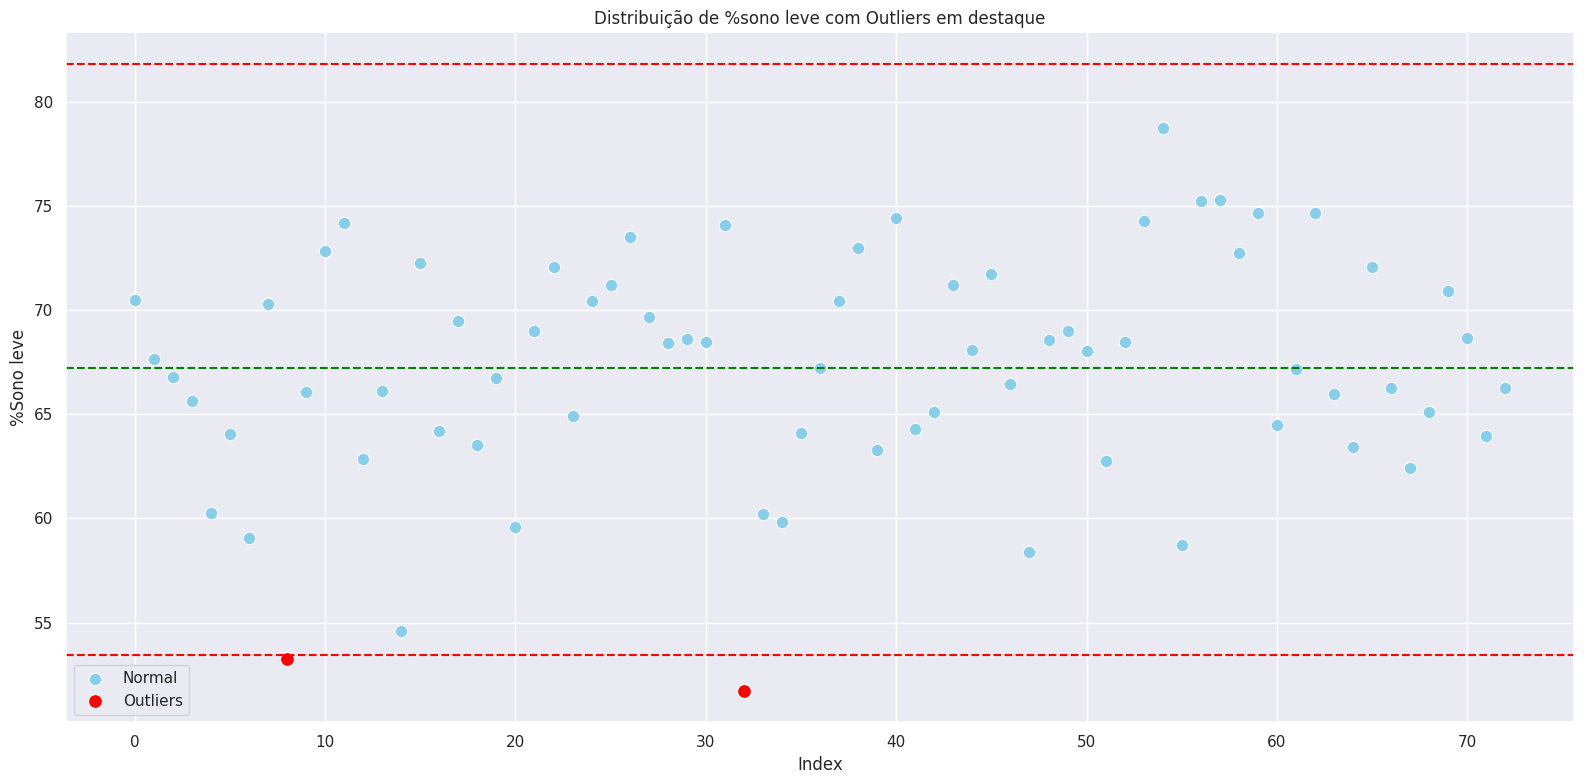


Análise de Outliers - Sono profundo (min)
• Primeiro Quartil (Q1): 49.00
• Terceiro Quartil (Q3): 78.00
• IQR: 29.00
• Limite Inferior: 5.50
• Limite Superior: 121.50
• Outliers Detected: 0


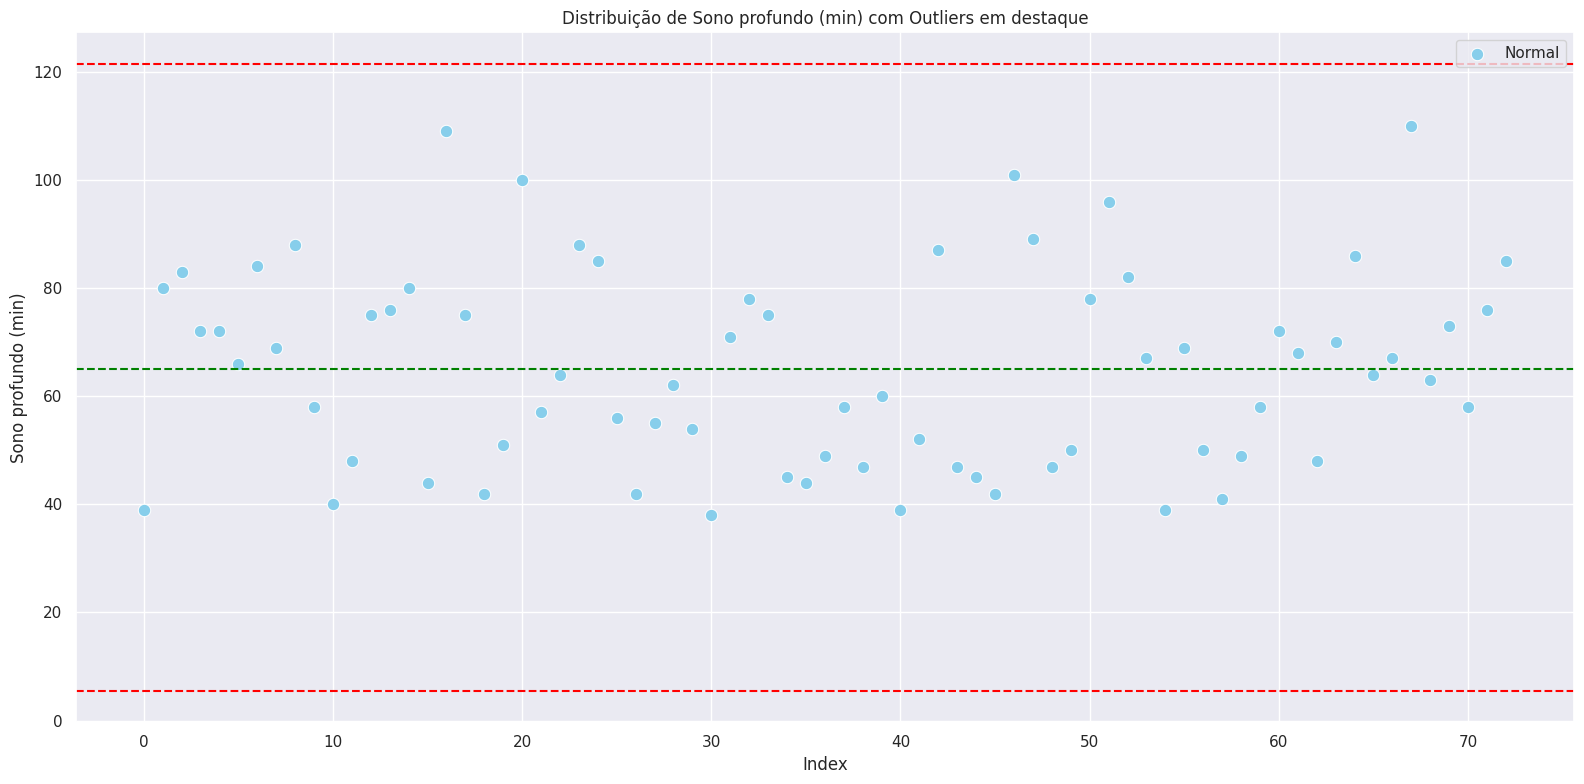


Análise de Outliers - %Sono profundo
• Primeiro Quartil (Q1): 12.14
• Terceiro Quartil (Q3): 18.14
• IQR: 6.00
• Limite Inferior: 3.14
• Limite Superior: 27.14
• Outliers Detected: 0


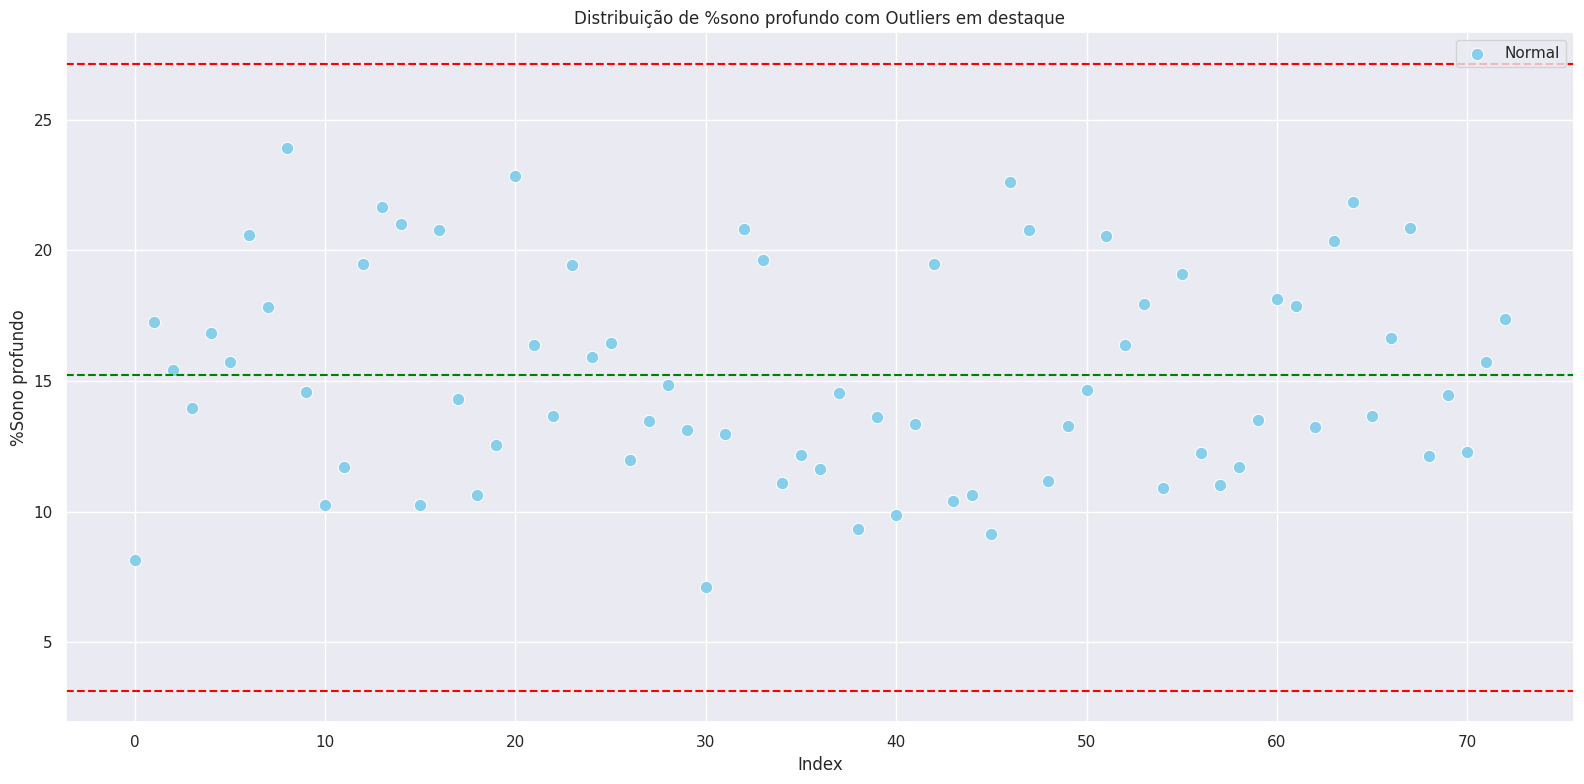


Análise de Outliers - REM (min)
• Primeiro Quartil (Q1): 65.00
• Terceiro Quartil (Q3): 88.00
• IQR: 23.00
• Limite Inferior: 30.50
• Limite Superior: 122.50
• Outliers Detected: 2


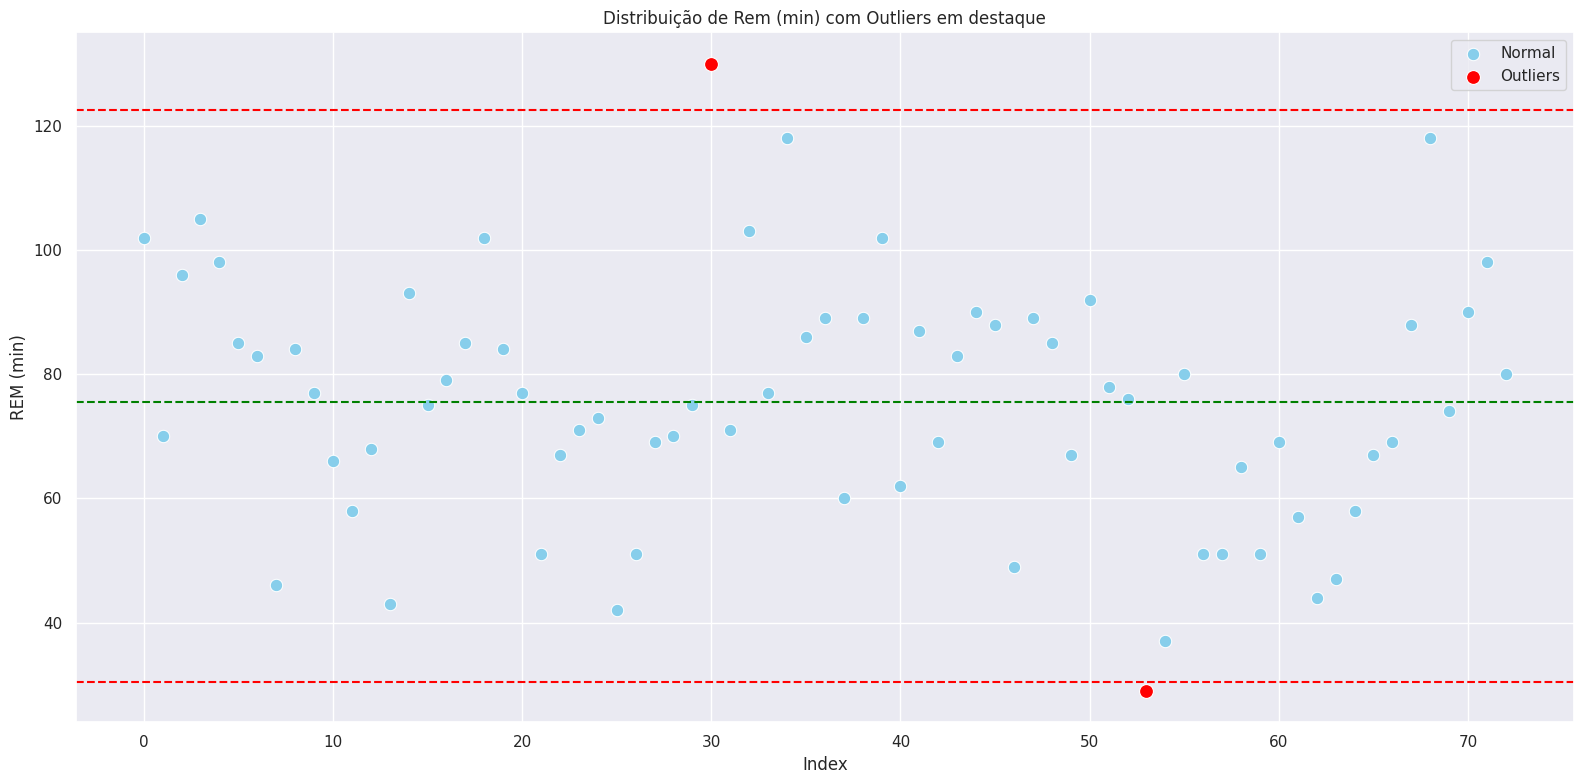


Análise de Outliers - %REM
• Primeiro Quartil (Q1): 14.66
• Terceiro Quartil (Q3): 20.34
• IQR: 5.68
• Limite Inferior: 6.14
• Limite Superior: 28.86
• Outliers Detected: 1


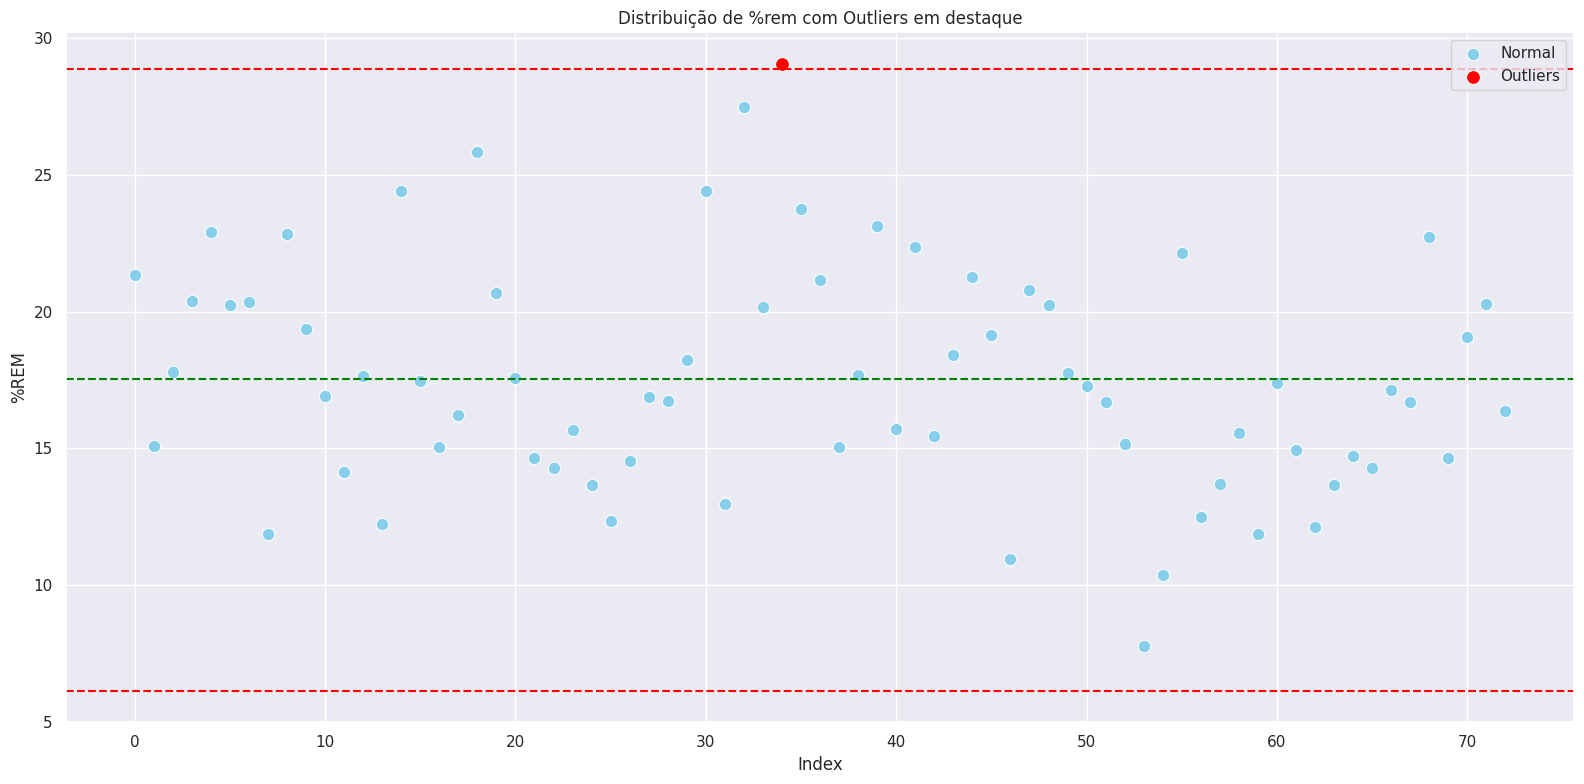


Análise de Outliers - Tempo acordado
• Primeiro Quartil (Q1): 4.00
• Terceiro Quartil (Q3): 15.00
• IQR: 11.00
• Limite Inferior: -12.50
• Limite Superior: 31.50
• Outliers Detected: 3


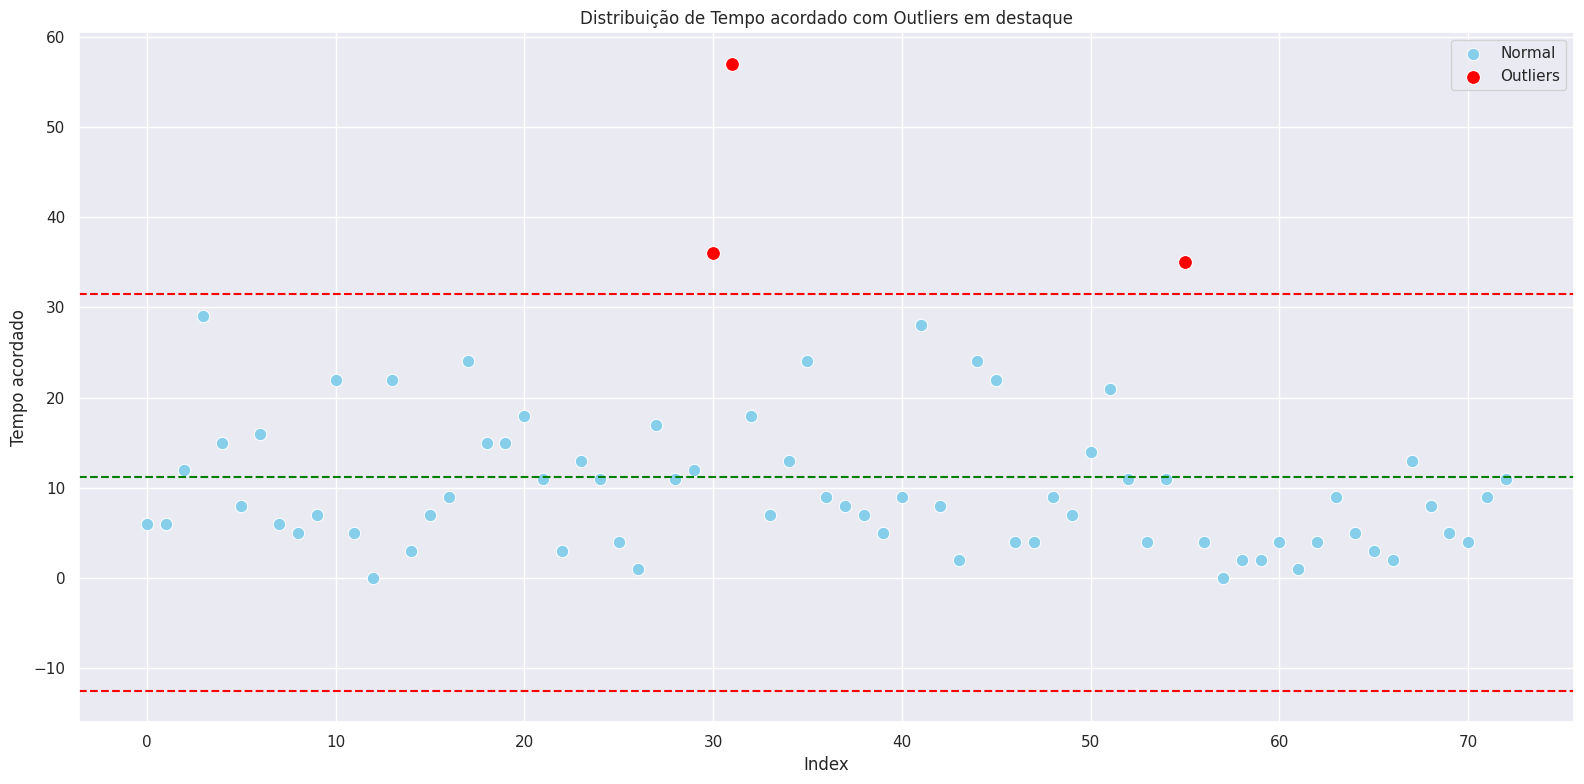


Análise de Outliers - Vezes acordado
• Primeiro Quartil (Q1): 1.00
• Terceiro Quartil (Q3): 3.00
• IQR: 2.00
• Limite Inferior: -2.00
• Limite Superior: 6.00
• Outliers Detected: 0


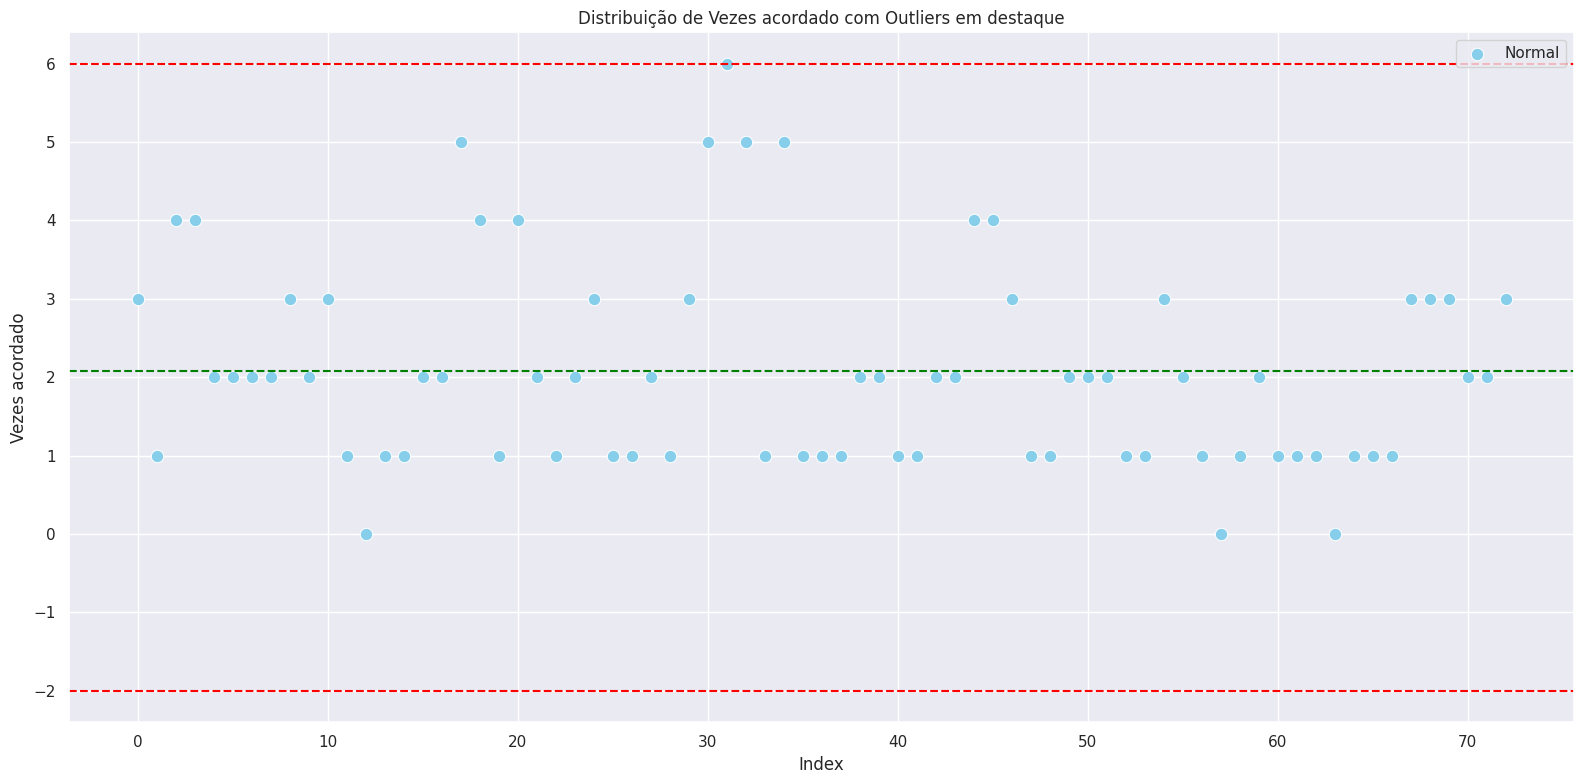

In [14]:
for metrica in metricas:
    Q1 = data[metrica].quantile(0.25)
    Q3 = data[metrica].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (data[metrica] < limite_inferior) | (data[metrica] > limite_superior)
    outliers_df = data[outliers_mask].copy()
    non_outliers_df = data[~outliers_mask].copy()

    print(f"\nAnálise de Outliers - {metrica}")
    print(f"• Primeiro Quartil (Q1): {Q1:.2f}")
    print(f"• Terceiro Quartil (Q3): {Q3:.2f}")
    print(f"• IQR: {IQR:.2f}")
    print(f"• Limite Inferior: {limite_inferior:.2f}")
    print(f"• Limite Superior: {limite_superior:.2f}")
    print(f"• Outliers Detected: {len(outliers_df)}")

    plt.figure(figsize=(16, 8))

    media = data[metrica].mean()

    sns.scatterplot(x=non_outliers_df.index, y=non_outliers_df[metrica], color="skyblue", label="Normal", s=80)
    sns.scatterplot(x=outliers_df.index, y=outliers_df[metrica], color="red", label="Outliers", s=100) 
    plt.axhline(limite_superior, color="red", linestyle="--")
    plt.axhline(limite_inferior, color="red", linestyle="--")
    plt.axhline(media, color="green", linestyle="--")

    plt.title(f"Distribuição de {metrica.capitalize()} com Outliers em destaque")
    plt.xlabel("Index")
    plt.ylabel(metrica)
    plt.legend()
    plt.tight_layout()
    plt.show()

Visualização de Histogramas

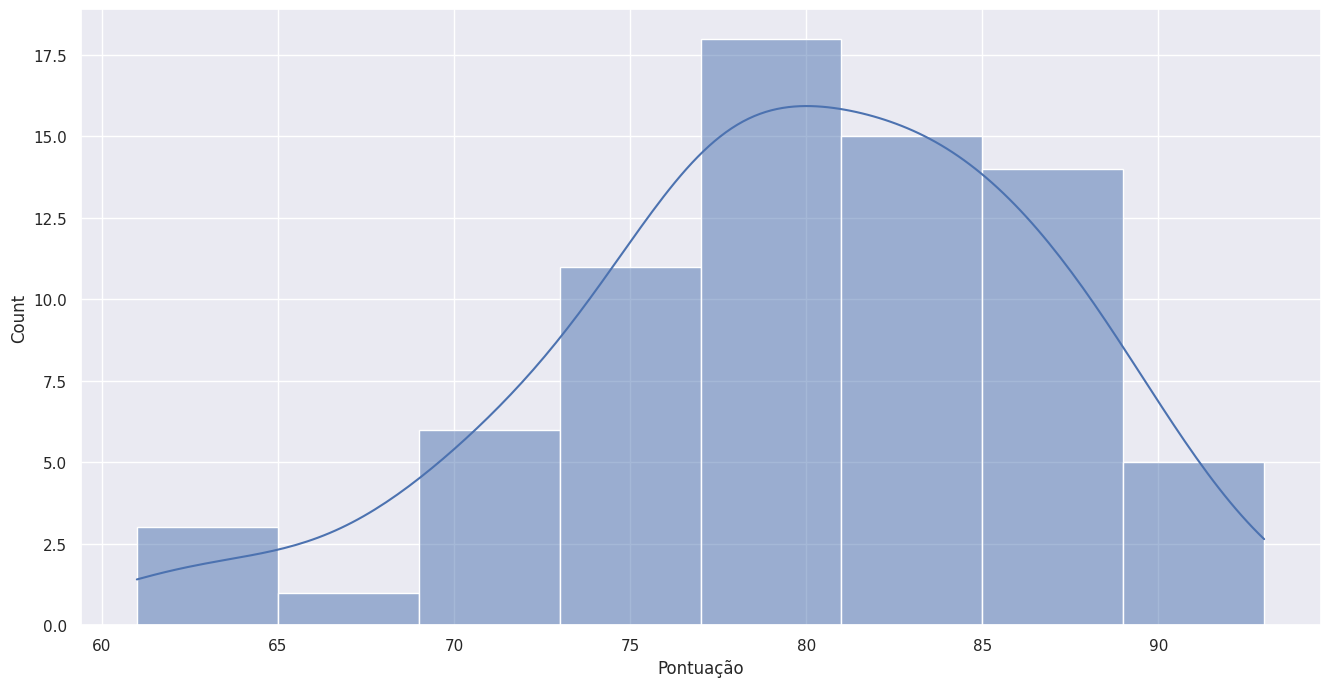

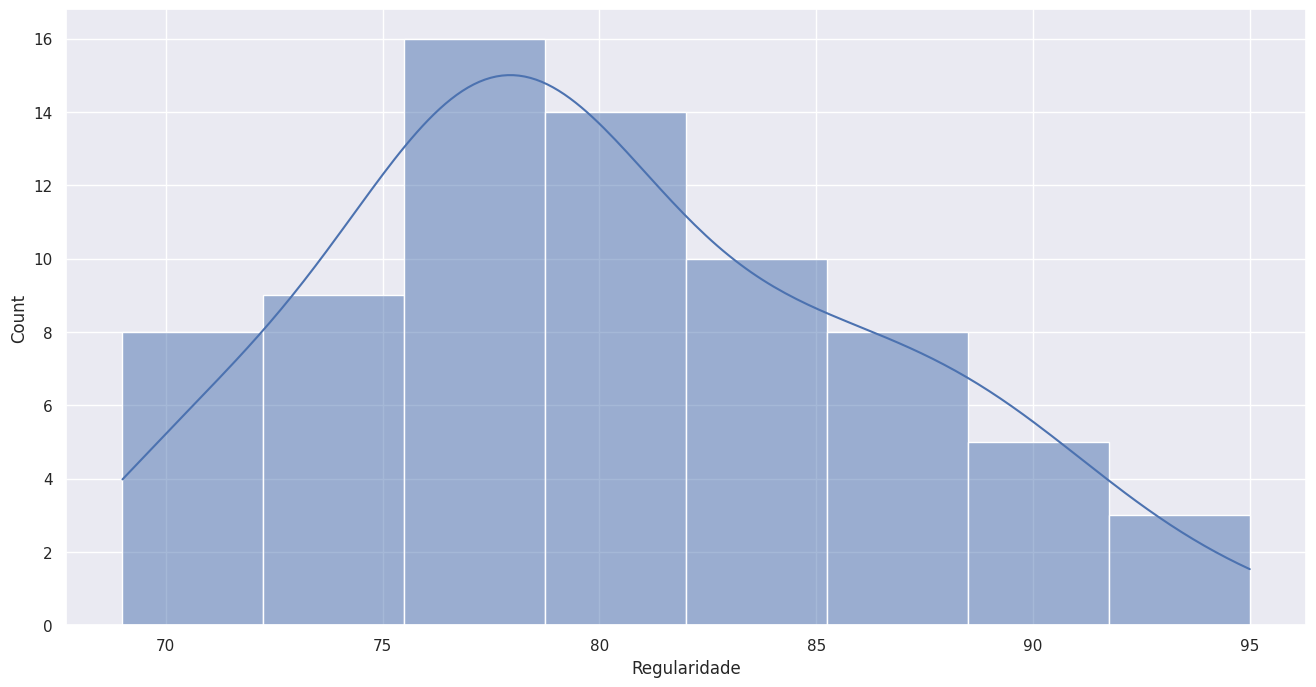

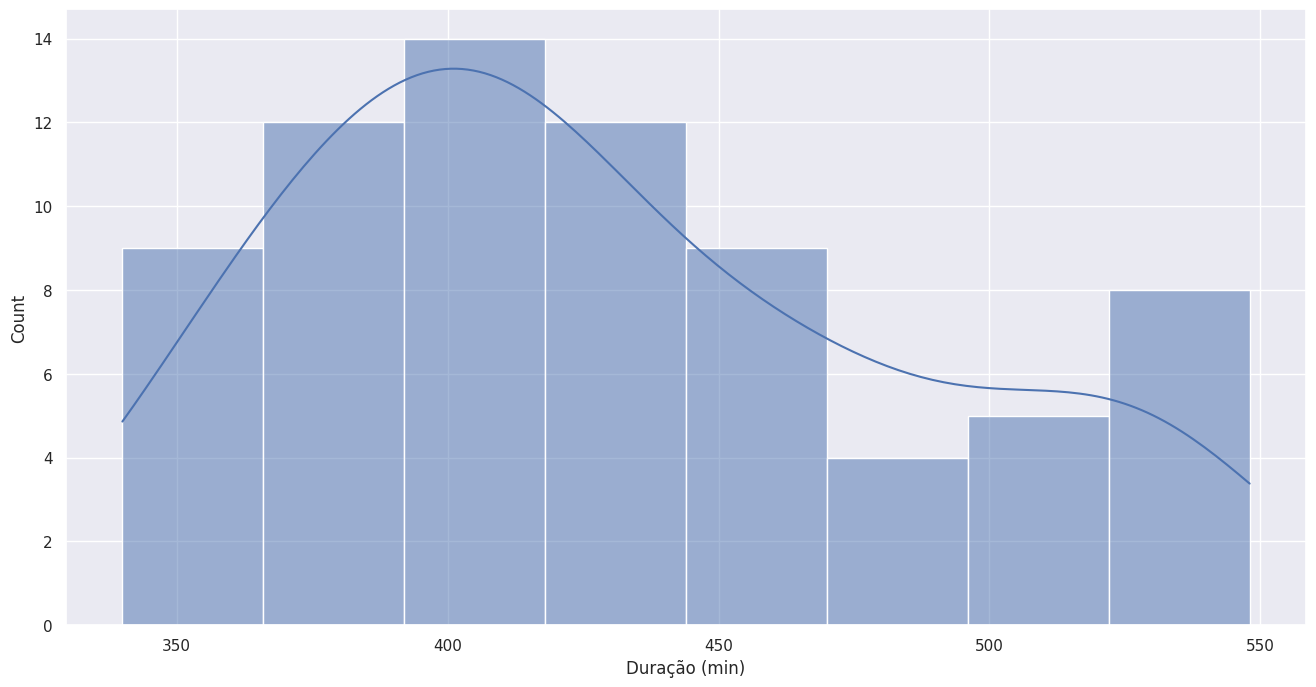

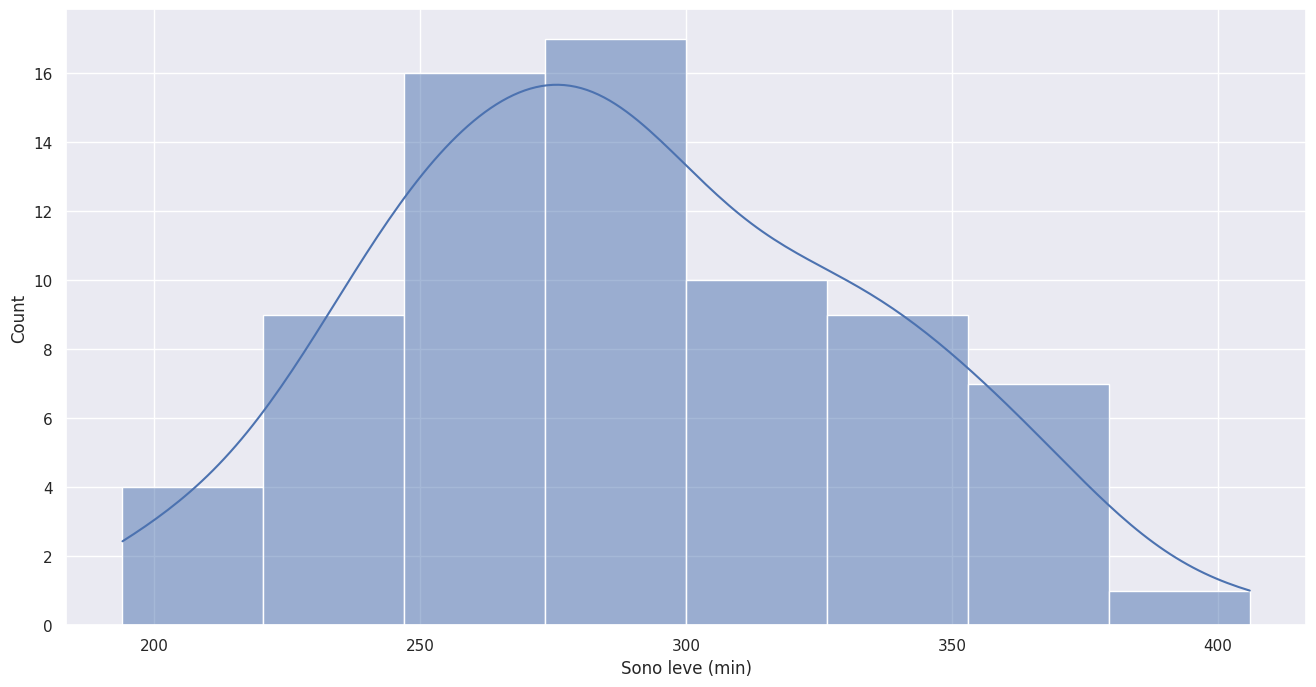

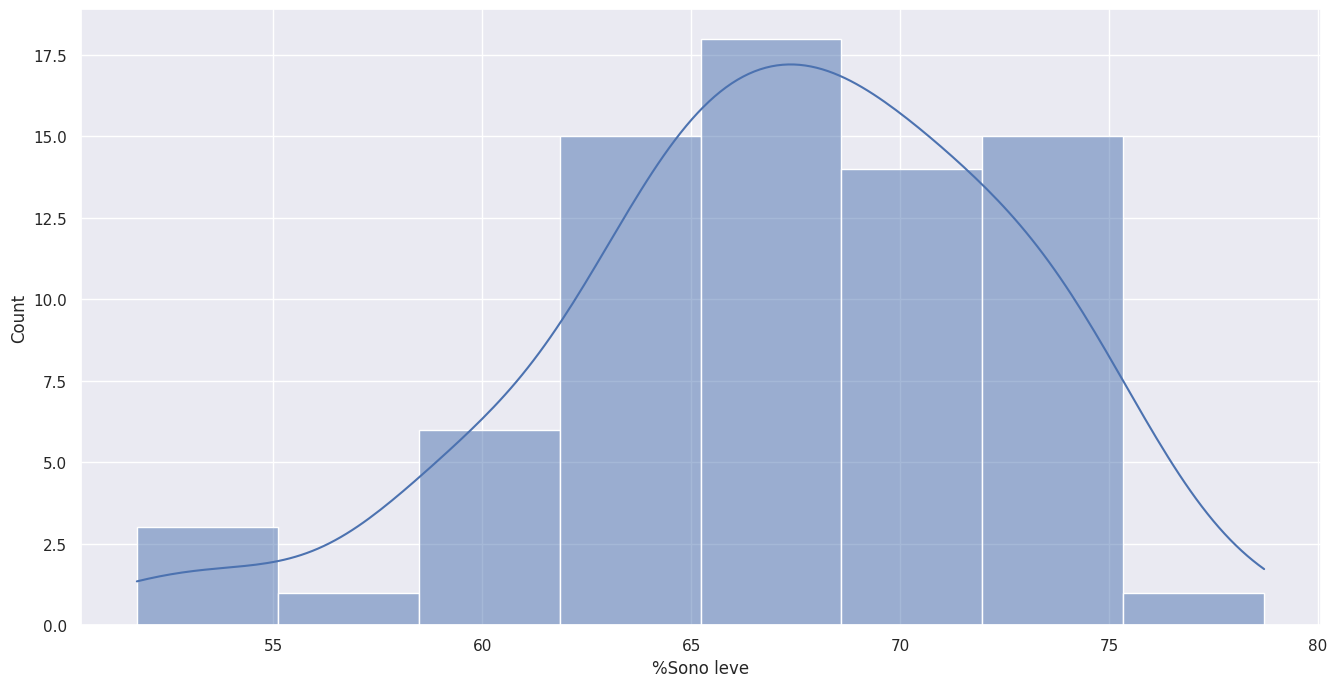

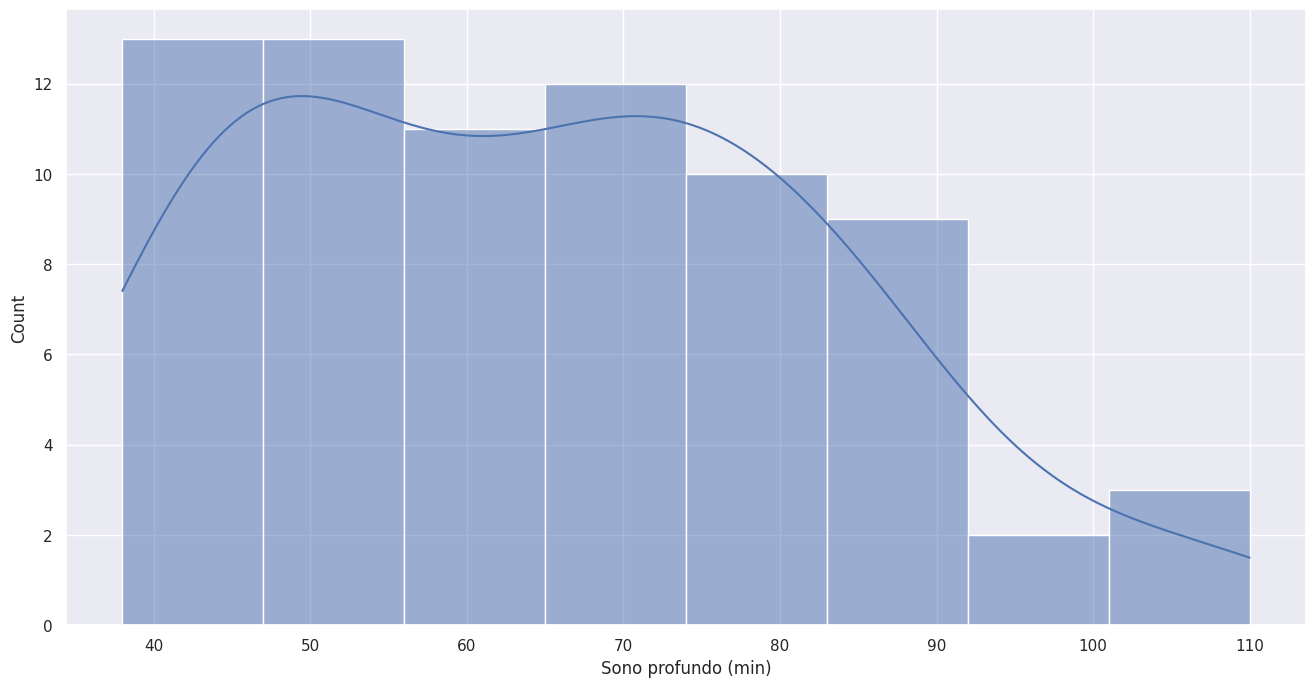

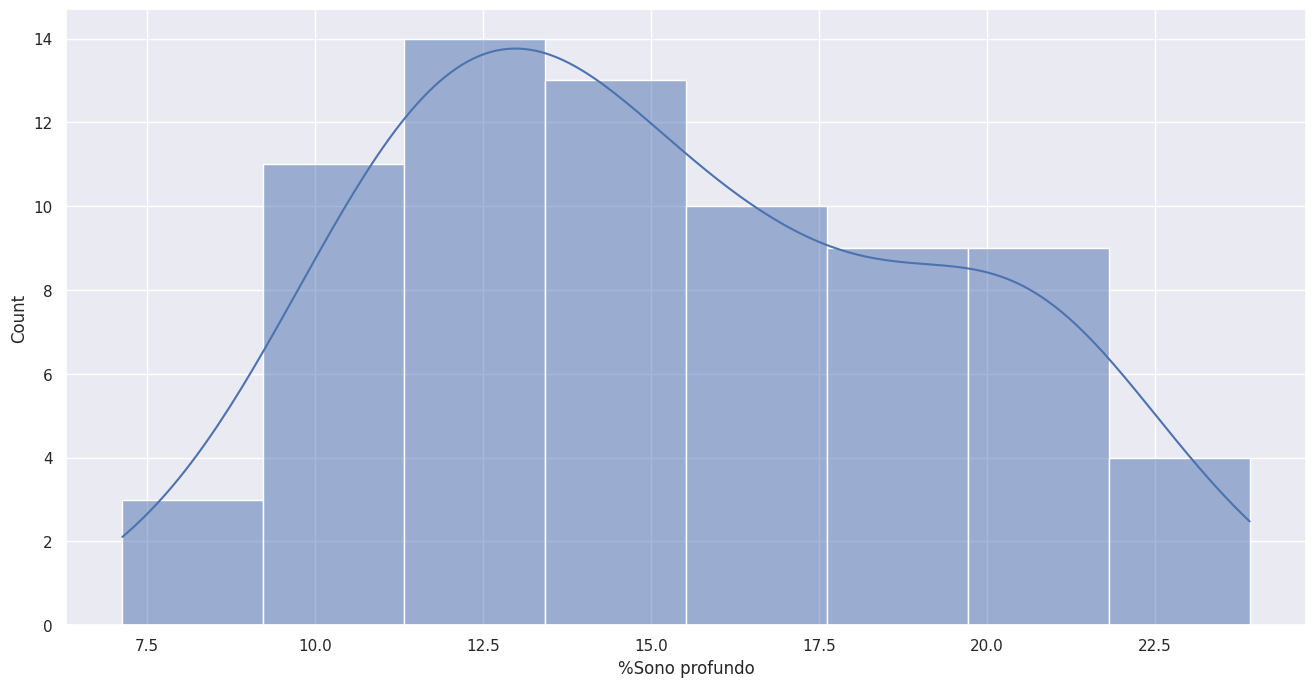

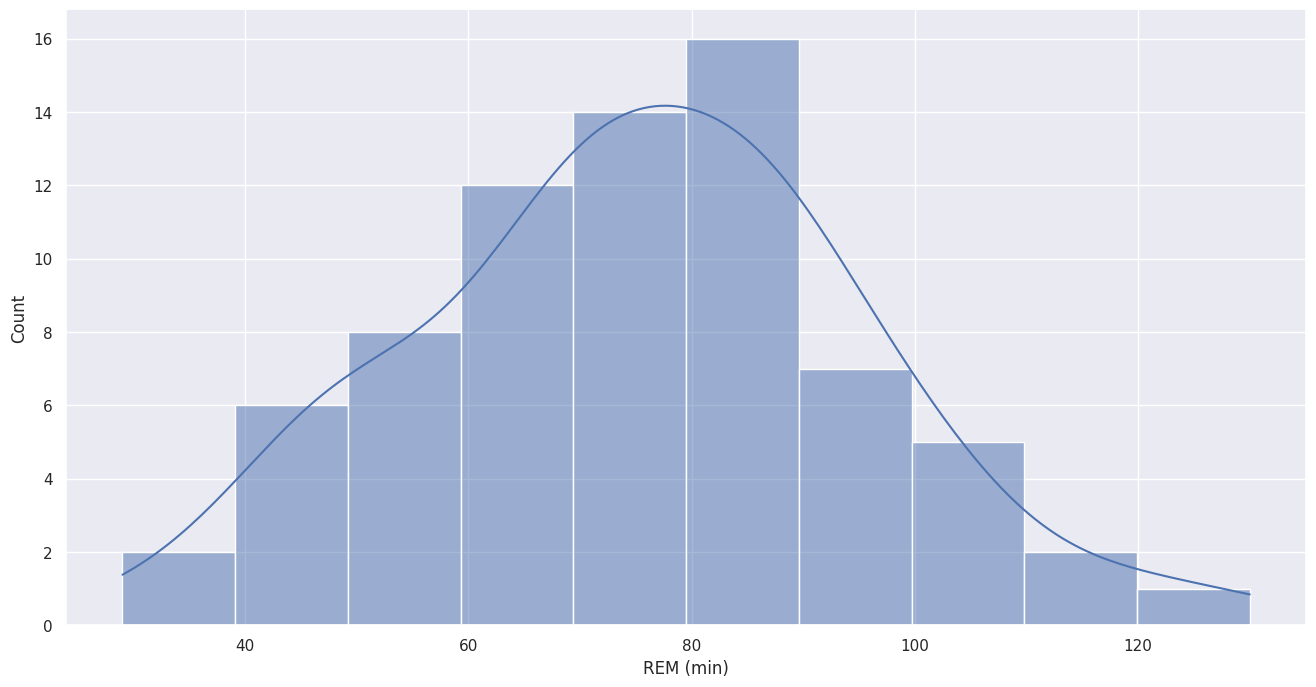

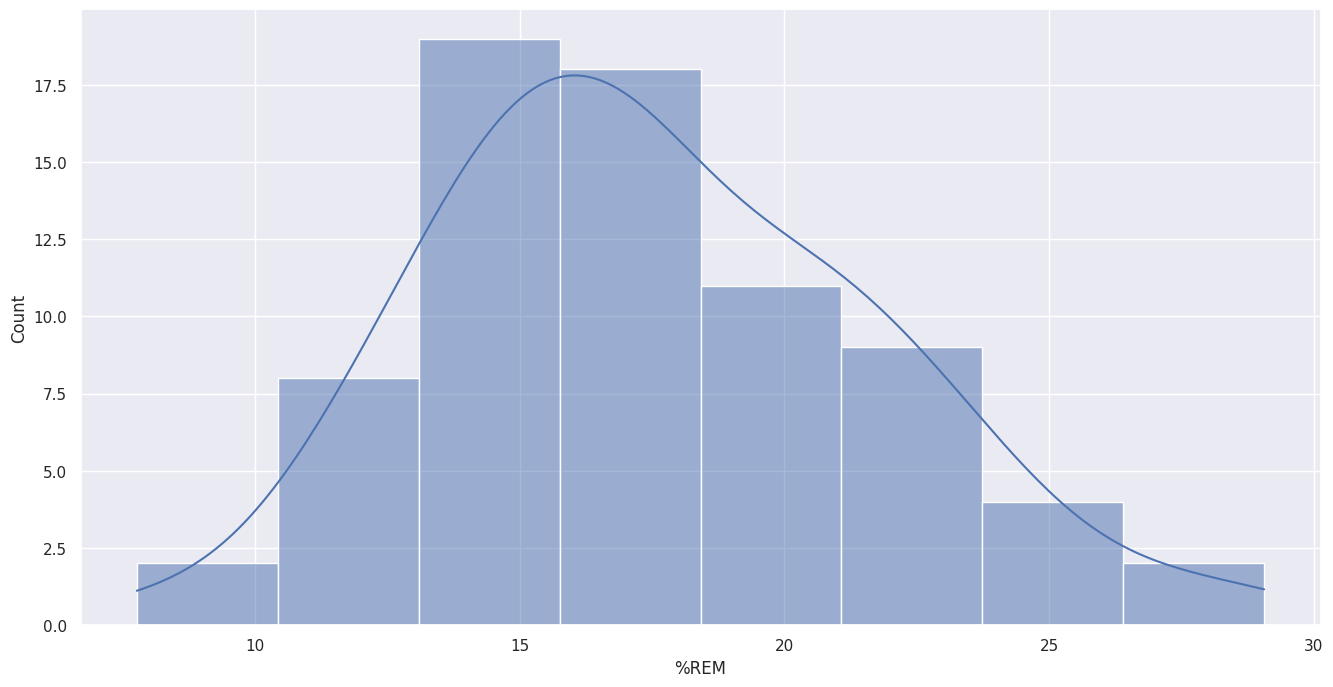

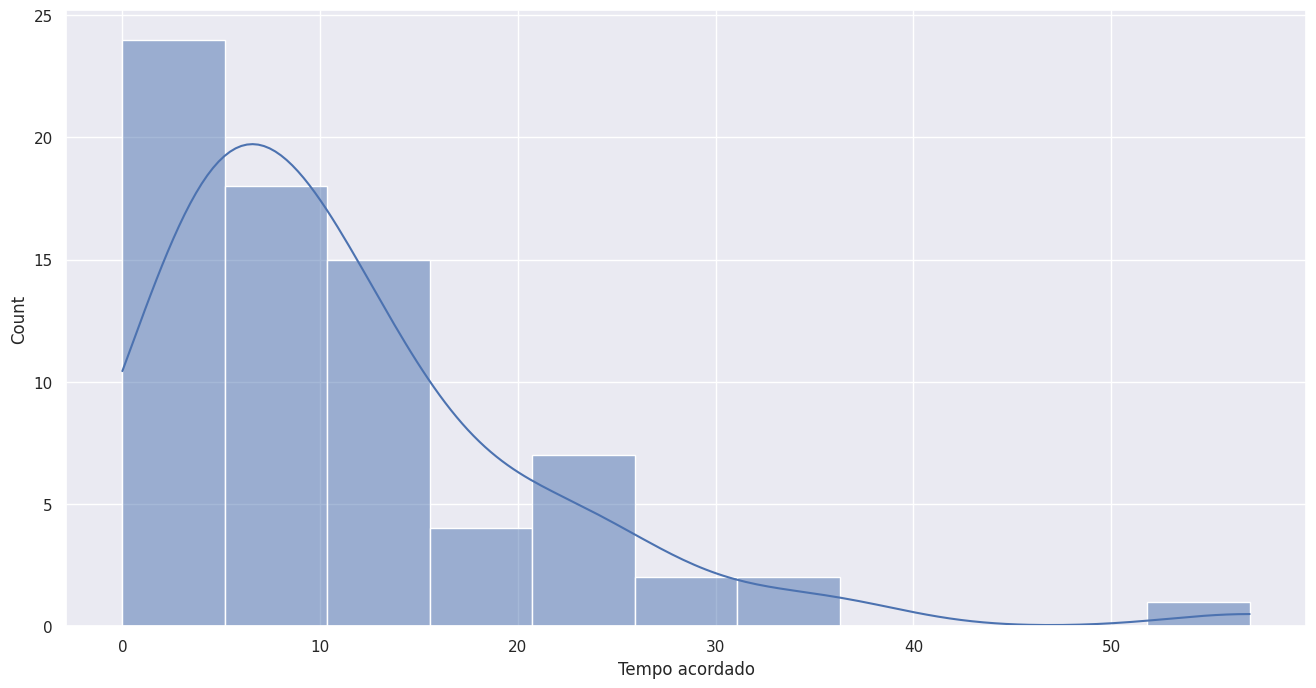

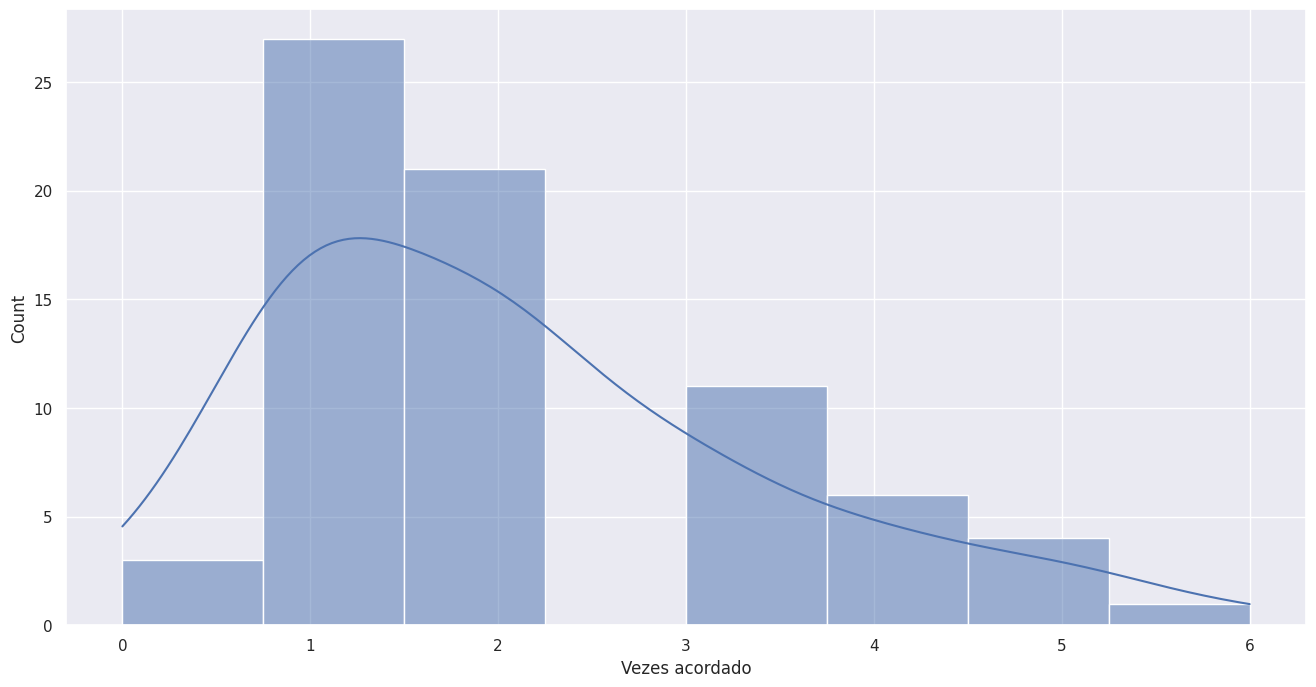

In [15]:
for metrica in metricas:
  plt.figure(figsize=(16, 8))
  sns.histplot(data=raw_data, x=metrica, kde=True)

Visualização de Violin Plot

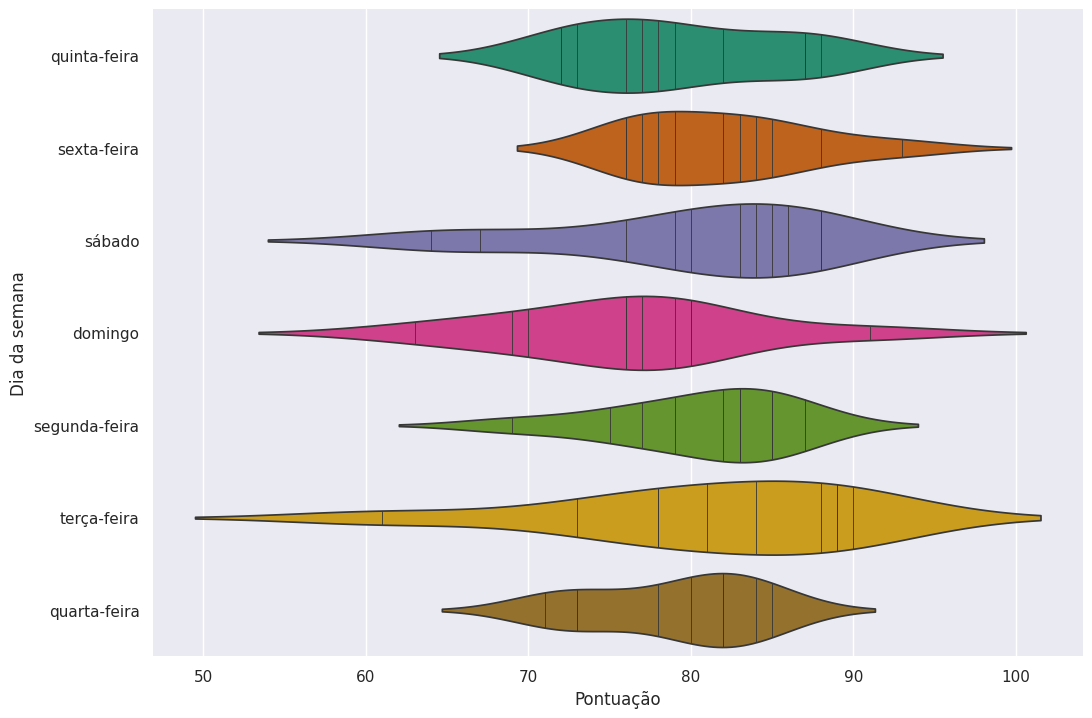

In [16]:
figsize = (12, 1.2 * len(raw_data['Dia da semana'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(raw_data, x='Pontuação', y='Dia da semana', inner='stick', palette='Dark2', hue='Dia da semana', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

In [17]:
media_pontuacao = raw_data["Pontuação"].mean()
media_pontuacao

np.float64(79.71232876712328)

Visualização geral de Pontuação e linha de média

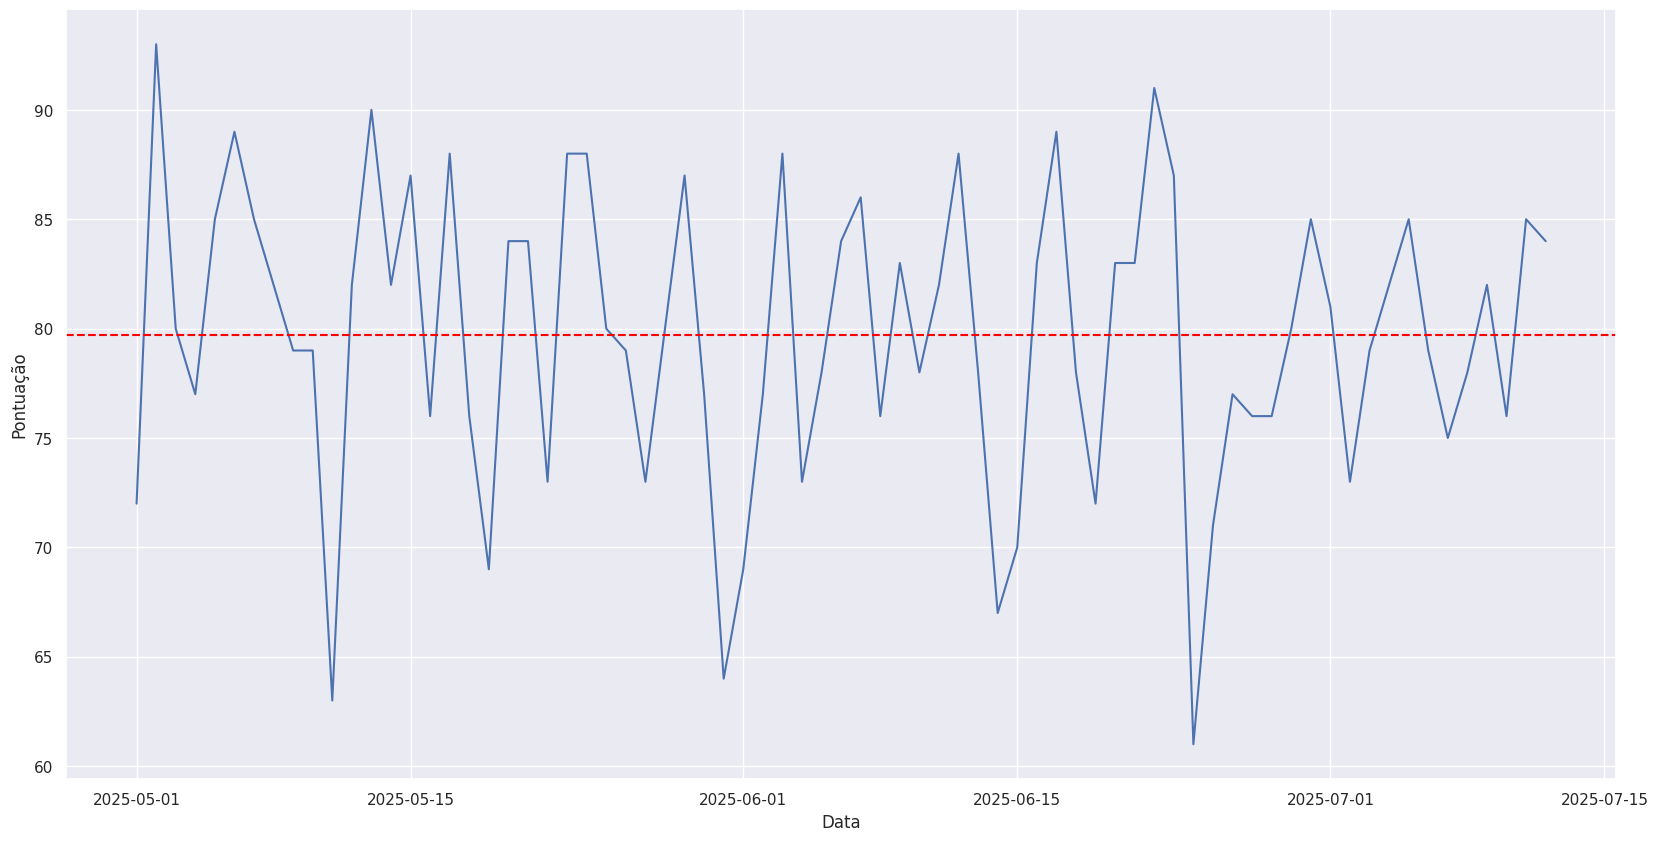

In [24]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x="Data", y="Pontuação")
plt.axhline(media_pontuacao, color="red", linestyle="--")
plt.xlabel("Data")
plt.show()

Gráfico de Correlação

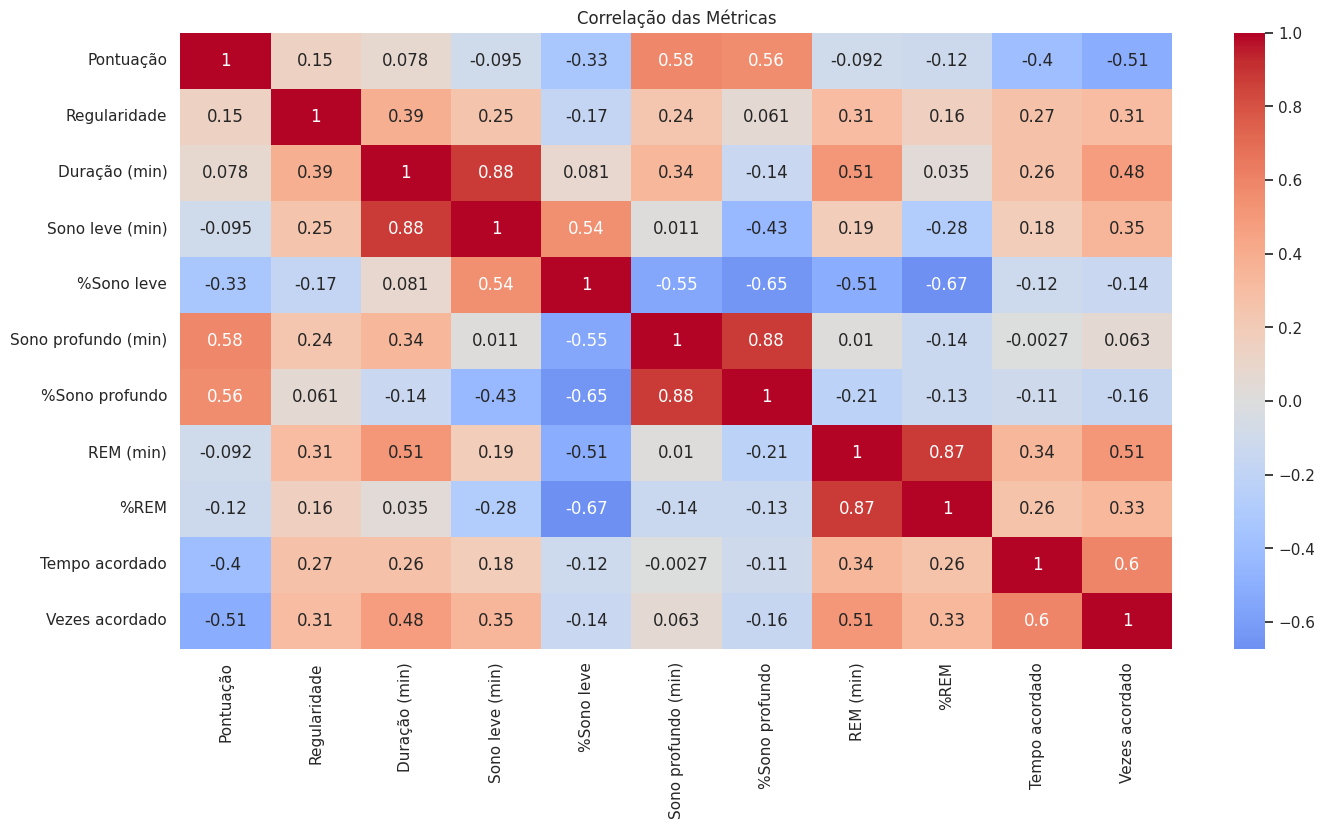

In [19]:
plt.figure(figsize=(16, 8))
sns.heatmap(data[metricas].corr(),  annot=True, cmap="coolwarm", center=0)
plt.title("Correlação das Métricas")
plt.show()

Utilização de Bar Plot (Stacked) para visualizar como está composta a duração do sono 

In [20]:
composicao_sono = ["Sono leve (min)", "Sono profundo (min)", "REM (min)"]

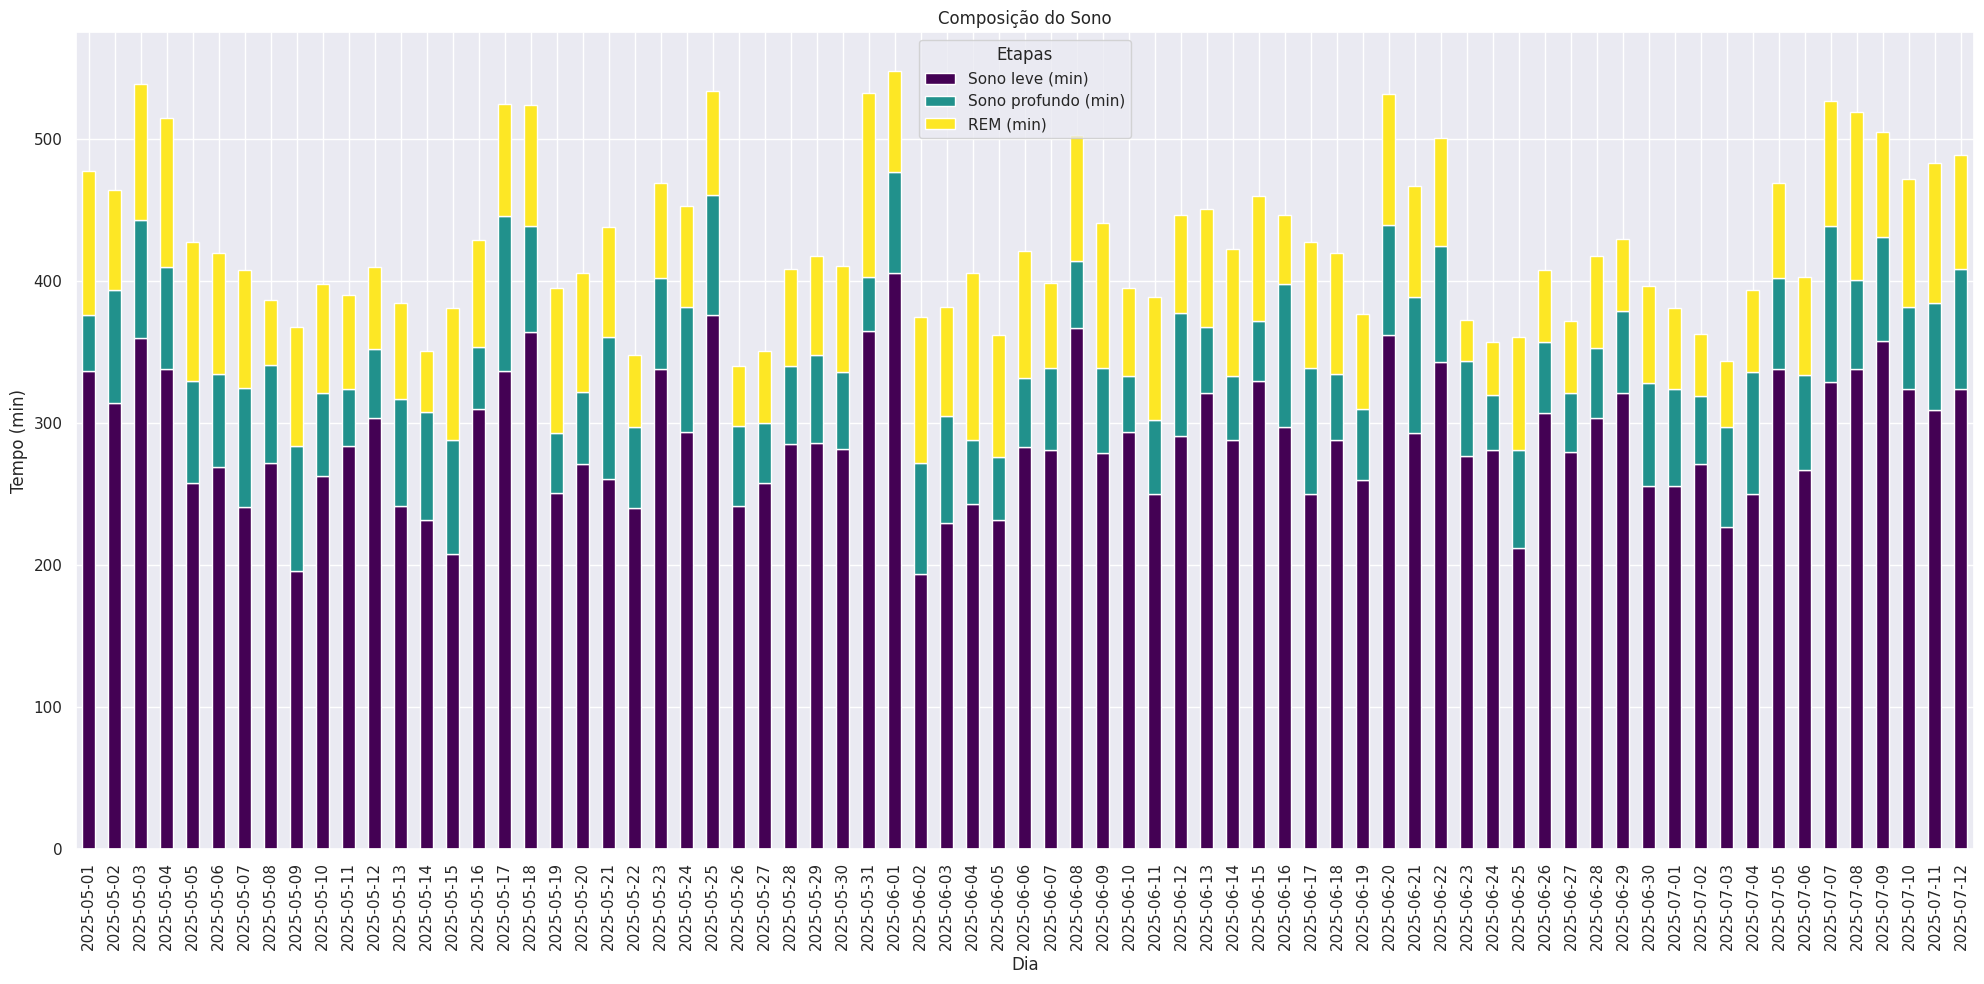

In [21]:

volume = data.groupby("Data")[composicao_sono].sum()

ax = volume.plot(
    kind="bar",
    stacked=True,
    figsize=(20, 10),
    colormap="viridis",
)
plt.title("Composição do Sono")
plt.xlabel("Dia")
plt.ylabel("Tempo (min)")
# plt.xticks(rotation=45, ha="right")
plt.legend(title="Etapas")

plt.tight_layout()
plt.show()



In [22]:
data_ordenado = data.sort_values(by="Pontuação", ascending=False)
data_ordenado.head()

,Data,Dia da semana,Pontuação,Regularidade,Duração (min),Sono leve (min),%Sono leve,Sono profundo (min),%Sono profundo,REM (min),%REM,Tempo acordado,Vezes acordado
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
52,2025-06-22,domingo,91,80,501,343,68.46,82,16.37,76,15.17,11,1
12,2025-05-13,terça-feira,90,75,385,242,62.86,75,19.48,68,17.66,0,0
5,2025-05-06,terça-feira,89,88,420,269,64.05,66,15.71,85,20.24,8,2
47,2025-06-17,terça-feira,89,74,428,250,58.41,89,20.79,89,20.79,4,1


In [25]:
data.to_csv("../data/cleaned.csv", index=False)